In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10,8

In [2]:
dataset = pd.read_csv("CRUELTY_TOTAL.csv")
# dataset['Year'] = pd.to_datetime(dataset['Year'], infer_datetime_format= True)
indexedDataset = dataset.set_index(['Year'])

In [3]:
from datetime import datetime
indexedDataset

,Cruelty by Husband or his Relatives
Year,
2001,49170
2002,49237
2003,50703
2004,58121
2005,58319
2006,63128
2007,75930
2008,81344
2009,89546


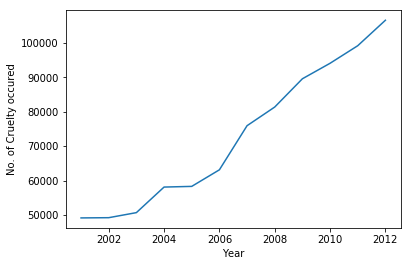

In [5]:
plt.xlabel("Year")
plt.ylabel("No. of Cruelty occured")
plt.plot(indexedDataset)

In [6]:
#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = indexedDataset.rolling(window=2).mean() #for determining the rolling mean and standard deviation
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean, rolstd)

      Cruelty by Husband or his Relatives
Year                                     
2001                                  NaN
2002                              49203.5
2003                              49970.0
2004                              54412.0
2005                              58220.0
2006                              60723.5
2007                              69529.0
2008                              78637.0
2009                              85445.0
2010                              91793.5
2011                              96588.0
2012                             102831.0       Cruelty by Husband or his Relatives
Year                                     
2001                                  NaN
2002                            47.376154
2003                          1036.618541
2004                          5245.318103
2005                           140.007143
2006                          3400.476511
2007                          9052.381013
2008                          3828

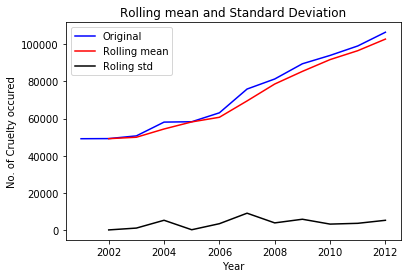

In [7]:
orig = plt.plot(indexedDataset, color ='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Roling std')
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("No. of Cruelty occured")
plt.title('Rolling mean and Standard Deviation')
plt.show(block=False)



In [8]:
#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of dickey-fuller test:')
dftest = adfuller(indexedDataset['Cruelty by Husband or his Relatives'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    
print(dfoutput)

Results of dickey-fuller test:
Test statstic                   0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


Text(0,0.5,'No. of cruelty occured')

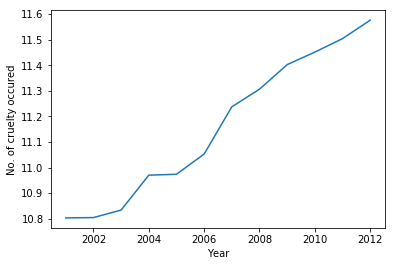

In [9]:
#as you can see the value of p is 0.9 ....but the null hypothesis should be as less as possible ...must be around 0.5
#hence we cannot reject the null hypothesis ...this shows that the data is not stationary 
indexedDataset_logScale = np.log(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_logScale) #since log of the data is done the y axis values changes accordingly bt the trend remains the same
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")

Text(0,0.5,'No. of cruelty occured')

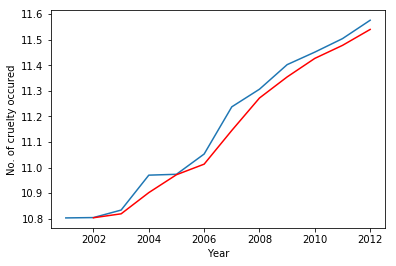

In [10]:
#calculating the mean and std of the log value
movingAverage = indexedDataset_logScale.rolling(window=2).mean()
movingSTD=indexedDataset_logScale.rolling(window=2).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")
#over here as well the data is not stationary the mean keeps changing according to the time

In [11]:
#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Cruelty by Husband or his Relatives
Year,
2002,0.000681
2003,0.014670
2004,0.068271
2005,0.001700
2006,0.039618
2007,0.092324
2008,0.034438
2009,0.048033
2010,0.024489


In [12]:
# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.xlabel("Year")
    plt.ylabel("No. of cruelty occured")
    plt.show(block=False)
 
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Cruelty by Husband or his Relatives'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

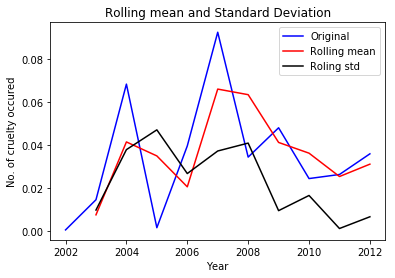

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [13]:
test_stationarity(datasetLogScaleMinusMovingAverage)

Text(0,0.5,'No. of cruelty occured')

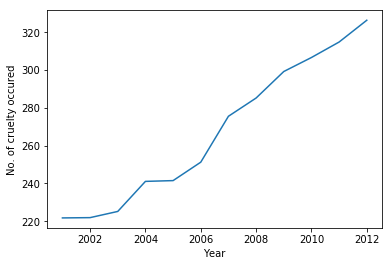

In [14]:
indexedDataset_sqScale = np.sqrt(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_sqScale)
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")

Text(0,0.5,'No. of cruelty occured')

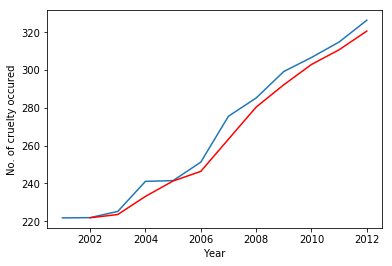

In [15]:
movingAveragesq = indexedDataset_sqScale.rolling(window=2).mean()
movingSTDsq = indexedDataset_sqScale.rolling(window=2).std()
plt.plot(indexedDataset_sqScale)
plt.plot(movingAveragesq,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")

In [16]:
datasetsqScaleMinusMovingAverage = indexedDataset_sqScale - movingAveragesq
datasetsqScaleMinusMovingAverage

datasetsqScaleMinusMovingAverage.dropna(inplace=True)
datasetsqScaleMinusMovingAverage

,Cruelty by Husband or his Relatives
Year,
2002,0.075512
2003,1.639574
2004,7.954853
2005,0.205149
2006,4.879795
2007,12.150563
2008,4.827354
2009,7.016841
2010,3.709337


Text(0,0.5,'No. of cruelty occured')

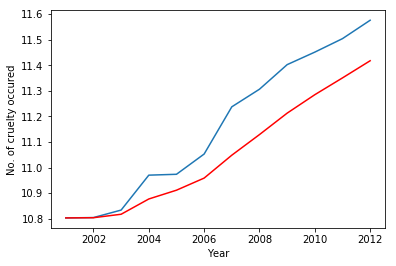

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife= 2,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAveragesq = timeseries.rolling(window=2).mean()
    movingSTDsq = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAveragesq, color='red', label='Rolling mean')
    std = plt.plot(movingSTDsq, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Cruelty by Husband or his Relatives'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

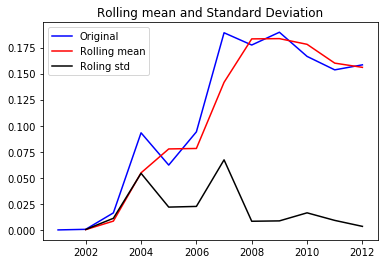

Results of dickey-fuller test:
Test statstic                 -1.965187
p-value                        0.302043
#Lags Used                     2.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [22]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Text(0,0.5,'No. of Insult occured')

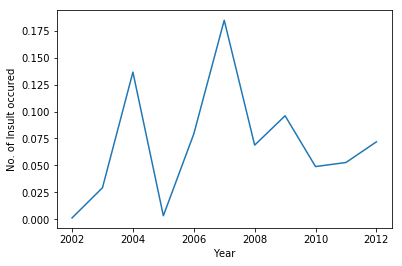

In [23]:
datasetLogDiffShifting = indexedDataset_logScale- indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")

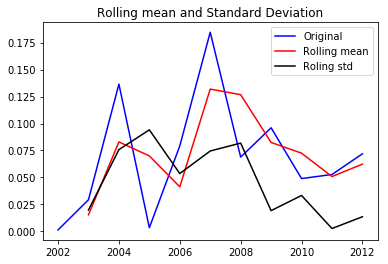

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [24]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

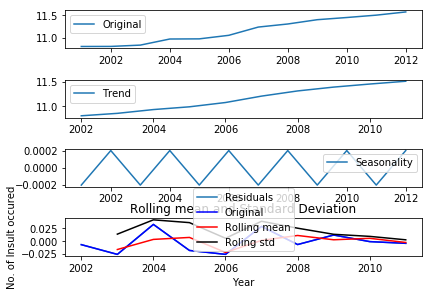

Results of dickey-fuller test:
Test statstic                  -0.000000
p-value                         0.958532
#Lags Used                      7.000000
Number of Observations Used     2.000000
Critical Value (1%)           -20.825625
Critical Value (5%)           -10.370190
Critical Value (10%)           -4.038220
dtype: float64


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale, freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale , label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


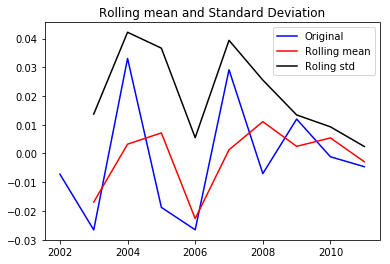

Results of dickey-fuller test:
Test statstic                  -0.000000
p-value                         0.958532
#Lags Used                      7.000000
Number of Observations Used     2.000000
Critical Value (1%)           -20.825625
Critical Value (5%)           -10.370190
Critical Value (10%)           -4.038220
dtype: float64


In [26]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


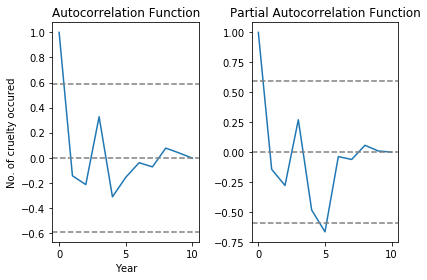

In [27]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags =10, method='ols')

#plotting acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Plotting AR model


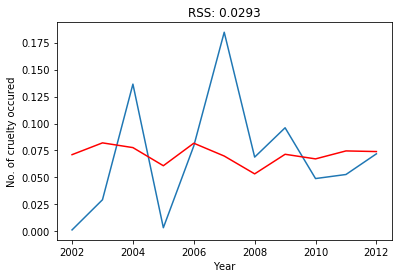

In [29]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset_logScale, order=(1,1,0)) #here the order includes value from the acf and pacf  ie p and q are the first downfall of the graph ie 1 and the midde value is the difference 
#the RSS value must be as low as possible
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Cruelty by Husband or his Relatives"])**2))
print('Plotting AR model')

Plotting AR model


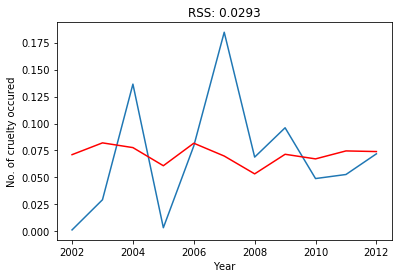

In [30]:
#MA Model
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset_logScale, order= (1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting["Cruelty by Husband or his Relatives"])**2))
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")
print('Plotting AR model')


Text(0,0.5,'No. of cruelty occured')

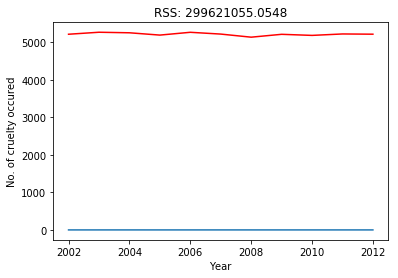

In [32]:
model = ARIMA(indexedDataset, order = (1,1,0))
import warnings
warnings.filterwarnings('ignore')
results_ARIMA =  model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Cruelty by Husband or his Relatives'])**2))
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")



In [33]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
2002    5216.903191
2003    5270.102637
2004    5255.650710
2005    5194.165457
2006    5268.749382
dtype: float64


In [34]:
#converting it to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
2002     5216.903191
2003    10487.005827
2004    15742.656537
2005    20936.821994
2006    26205.571376
2007    31426.688282
2008    36565.236030
2009    41780.103175
2010    46966.169767
2011    52190.530351
2012    57408.703154
dtype: float64


In [36]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Cruelty by Husband or his Relatives'].iloc[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
2001       10.803039
2002     5227.706230
2003    10497.808866
2004    15753.459576
2005    20947.625033
dtype: float64

Text(0,0.5,'No. of cruelty occured')

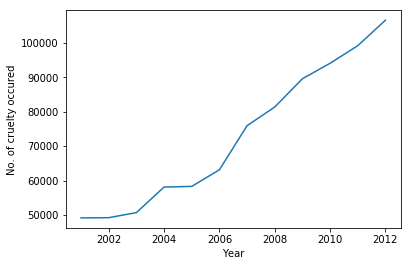

In [39]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")

#orange line is the model that we have fitted 

In [40]:
 #before predicitng check the no. of rows
indexedDataset_logScale

,Cruelty by Husband or his Relatives
Year,
2001,10.803039
2002,10.804401
2003,10.833740
2004,10.970282
2005,10.973683
2006,11.052920
2007,11.237567
2008,11.306442
2009,11.402508


Text(0,0.5,'No. of cruelty occured')

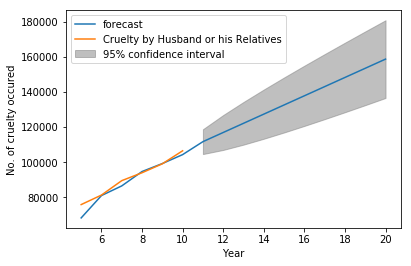

In [41]:
results_ARIMA.plot_predict(6,21)
import warnings
warnings.filterwarnings('ignore')
plt.xlabel("Year")
plt.ylabel("No. of cruelty occured")